<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/%D0%92%D0%95%D0%9A%D0%A2%D0%9E%D0%A0%D0%98%D0%97%D0%90%D0%A6%D0%98%D0%AF_%D0%A2%D0%95%D0%9A%D0%A1%D0%A2%D0%9E%D0%92_%D0%B0%D0%B2%D1%82%D0%BE%D0%B1%D1%80%D0%B5%D1%8F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Снижение размерности
* LSI
* PCA
* t-SNE
* UMAP

##### импорты и вспомогательный код

In [ ]:
!pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.pipeline import *
from sklearn.metrics import *
from sklearn.cluster import *
from sklearn.feature_extraction.text import *
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE, MDS
import re
import umap
import gensim
import seaborn as sns

In [ ]:
%matplotlib inline

style.use('ggplot')

def draw_subplots(data, colors, plotname, n_clusters, plot_centers=False, 
                  cmap='viridis', header='Clustering example'):
    plot = plotname
    
    # рисуем нули
    plot.axhline(0, color='#afafaf')
    plot.axvline(0, color='#afafaf')
    
    # рисуем точки
    for i in range(n_clusters):
        try:
            sc = plot.scatter(data[i:,0], data[i:,1], s=30, c=colors, cmap=cmap)
        except (KeyError, ValueError) as e: # костыль для бага матплотлиба
            pass
  
    
    # рисуем центроиды
    if plot_centers == True:
        plot.scatter(centers[:,0], centers[:,1], marker="x", c='r')
    
    # подписи осей
    plot.set_xlabel('Principal Component 1')
    plot.set_ylabel('Principal Component 2')
    
    size=81
    
    lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                            label=i, ls="", marker="o")[0]
    handles = [lp(i) for i in np.unique(colors)]
    plot.legend(handles=handles)

    # заголовок
    plot.set_title(header)

## Возьмём какие-то данные и поснижаем у них размерность
Давайте возьмём для примера датасет новостей из sklearn. Снижение размерности будем рассматривать на его Tf-Idf представлении. 

In [ ]:
dataset.target_names

NameError: ignored

In [ ]:
interesting_doc_ix = 5
dataset.data[interesting_doc_ix], \
dataset.target[interesting_doc_ix], \
dataset.target_names[dataset.target[interesting_doc_ix]]

In [ ]:
cats = ['talk.religion.misc', 'sci.space', 'talk.politics.mideast', 'comp.graphics']

dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, categories=cats)

print(len(dataset.data), "documents")
print(len(dataset.target_names), "categories")

data = dataset.data
labels = dataset.target

3528 documents
4 categories


In [ ]:
vectorizer_machine = TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1,3), stop_words ='english')
tfidf_vectors = vectorizer_machine.fit_transform(data)
tfidf_vectors.shape

(3528, 37147)

In [ ]:
vectorizer_machine.get_feature_names()[10000]

'deplorable'

In [ ]:
list(tfidf_vectors[0][0])

[<1x37147 sparse matrix of type '<class 'numpy.float64'>'
 	with 321 stored elements in Compressed Sparse Row format>]

In [ ]:
import pandas
pandas.DataFrame.sparse.from_spmatrix(tfidf_vectors)#.rename(vectorizer_machine.get_feature_names(), inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,37107,37108,37109,37110,37111,37112,37113,37114,37115,37116,37117,37118,37119,37120,37121,37122,37123,37124,37125,37126,37127,37128,37129,37130,37131,37132,37133,37134,37135,37136,37137,37138,37139,37140,37141,37142,37143,37144,37145,37146
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.017778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02806,0.0,0.0,0.028109,0.0,0.028109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Учим снижение размерности для данных

#### LSI


In [ ]:
labels

array([2, 3, 1, ..., 1, 2, 3])

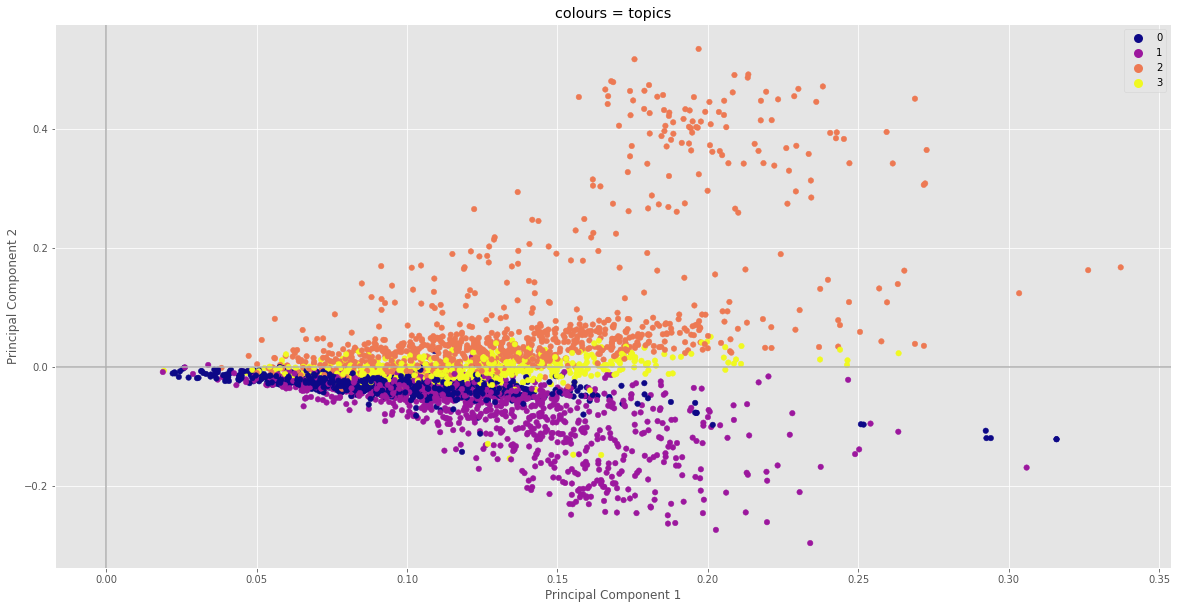

In [ ]:
svd = TruncatedSVD(n_components=2)
X_2D_SVD = svd.fit_transform(tfidf_vectors.todense())


# рисуем сабплоты
fig, plot1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(20, 10))


# цвета = темы
draw_subplots(X_2D_SVD, labels, plot1, 1, header='colours = topics', cmap='plasma', plot_centers=False)

#### PCA

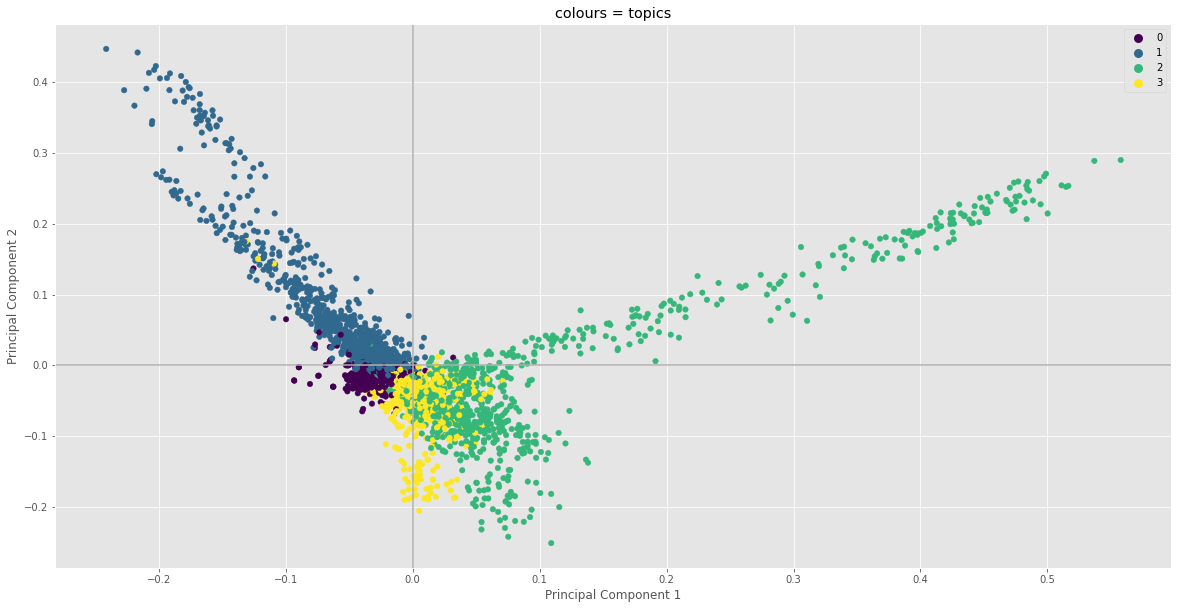

In [ ]:
pca = PCA(n_components=2)
X_2D_PCA = pca.fit_transform(tfidf_vectors.todense())

# рисуем сабплоты
fig, plot1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(20, 10))


# цвета = темы
draw_subplots(X_2D_PCA, labels, plot1, 1, header='colours = topics')

In [ ]:
dataset.target_names

['comp.graphics', 'sci.space', 'talk.politics.mideast', 'talk.religion.misc']

#### t-SNE

In [ ]:
%time X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X.todense())

# достаем названия тем по их номерам
topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

##### Хаки с t-SNE
Можно предснизить размерность e.g. PCA, а потом применять t-SNE.


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3528 samples in 0.022s...
[t-SNE] Computed neighbors for 3528 samples in 1.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3528
[t-SNE] Computed conditional probabilities for sample 2000 / 3528
[t-SNE] Computed conditional probabilities for sample 3000 / 3528
[t-SNE] Computed conditional probabilities for sample 3528 / 3528
[t-SNE] Mean sigma: 0.082166
[t-SNE] Computed conditional probabilities in 0.288s
[t-SNE] Iteration 50: error = 80.0977936, gradient norm = 0.0236379 (50 iterations in 2.935s)
[t-SNE] Iteration 100: error = 75.7645874, gradient norm = 0.0044271 (50 iterations in 1.807s)
[t-SNE] Iteration 150: error = 75.7066498, gradient norm = 0.0023555 (50 iterations in 1.668s)
[t-SNE] Iteration 200: error = 75.6998978, gradient norm = 0.0006909 (50 iterations in 1.652s)
[t-SNE] Iteration 250: error = 75.6856003, gradient norm = 0.0011291 (50 iterations in 1.668s)
[t-SNE] KL divergence after 250 iterat

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


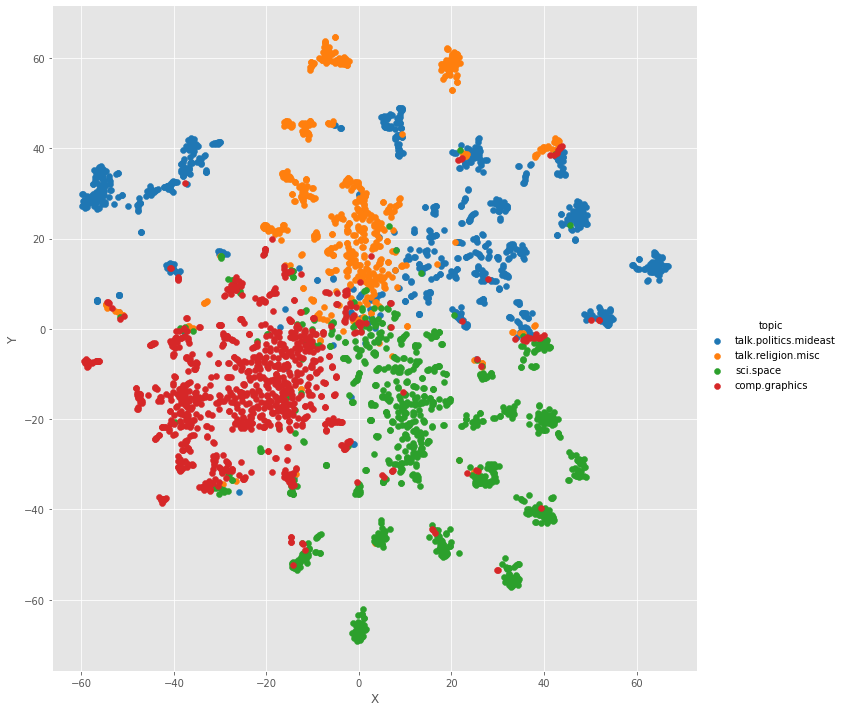

In [ ]:
svd50 = TruncatedSVD(n_components=50)
X_50_SVD = svd50.fit_transform(tfidf_vectors.todense())
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_50_SVD)

sns.set_palette('tab10')

# достаем названия тем по их номерам
topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

In [ ]:
pca30 = PCA(n_components=30)
X_30_PCA = pca30.fit_transform(X.todense())
X_embedded_2 = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_30_PCA)

sns.set_palette('tab10')

# достаем названия тем по их номерам
topics = [dataset.target_names[t] for t in labels]

df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : topics})
sns.FacetGrid(df, hue="topic", size=10).map(plt.scatter, "X", "Y").add_legend()

### UMAP



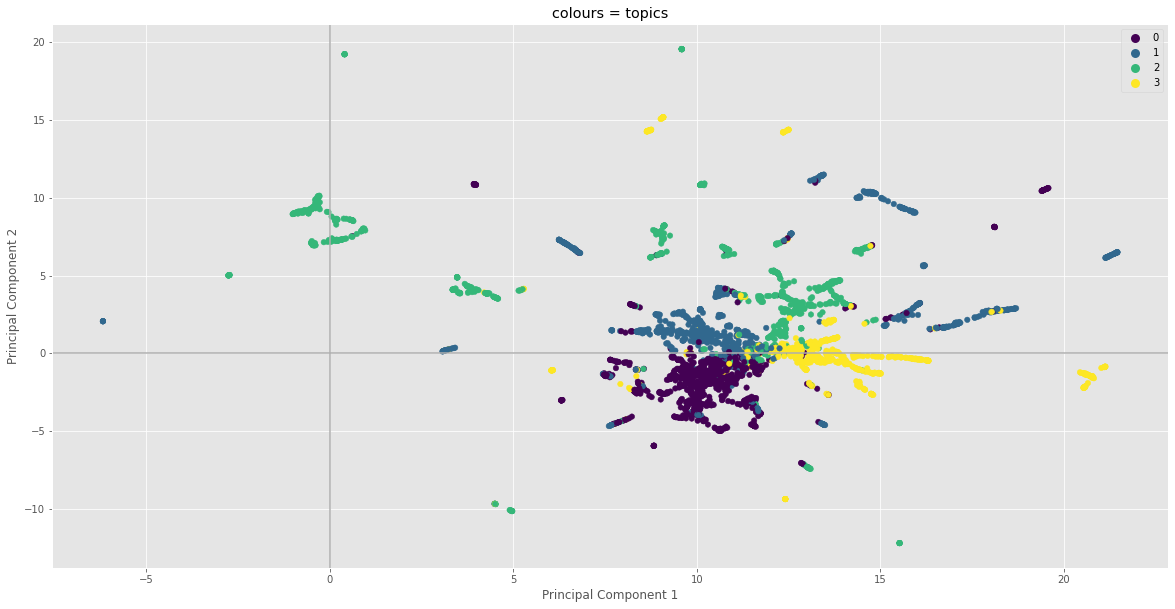

In [ ]:
umap_emb = umap.UMAP()
# X_2D_umap = umap_emb.fit_transform(X.todense())
X_2D_umap = umap_emb.fit_transform(X_50_SVD)


# рисуем сабплоты
fig, plot1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(20, 10))

# цвета = темы
draw_subplots(X_2D_umap, labels, plot1, n_clusters, header='colours = topics')

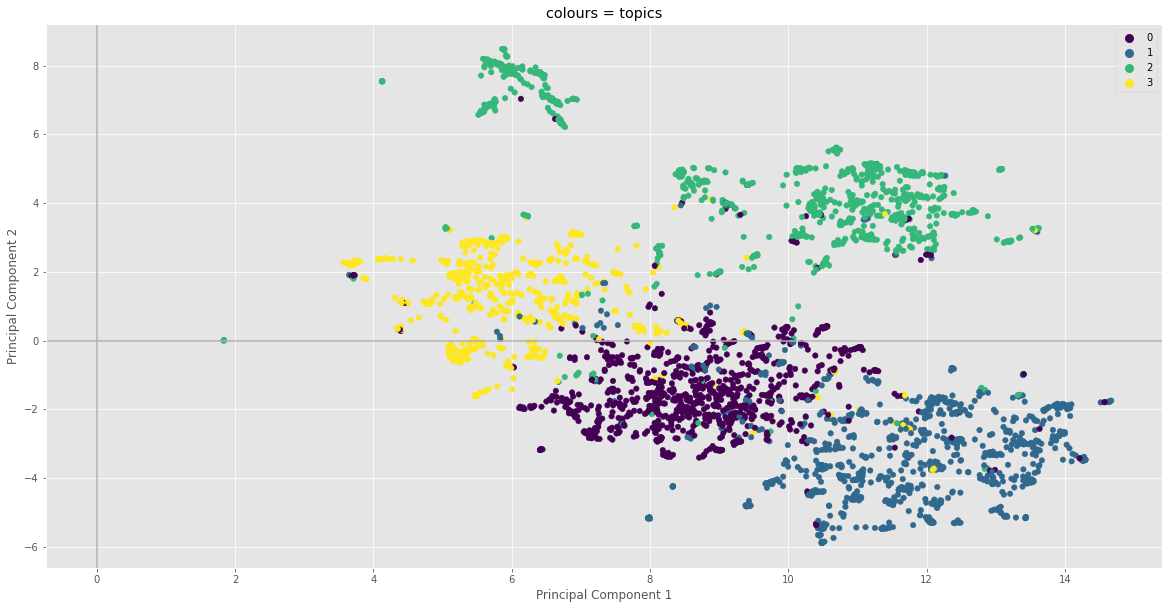

In [ ]:
umap_emb = umap.UMAP()
X_2D_umap = umap_emb.fit_transform(X.todense())
# X_2D_umap = umap_emb.fit_transform(X_50_SVD)


# рисуем сабплоты
fig, plot1 = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(20, 10))

# цвета = темы
draw_subplots(X_2D_umap, labels, plot1, n_clusters, header='colours = topics')

## Задание
#### 1
Проделайте все то же самое с другим набором тем или на каком-нибудь вашем датасете.  
Хорошо ли отделяются друг от друга близкие темы (например, 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space')?  
Соответствует ли количество тем количеству кластеров, или же кластеров на глаз больше/меньше?

#### 2
Задайте побольше классов (например, 20) в KMeans, а потом преобразуйте данные с помощью t-SNE и раскрасьте точки на графике в соответствии с полученными из KMeans кластерами.  
Насколько результаты кластеризации совпадают с проекцией t-SNE?

#### 3
Возьмите датасет русских новостей, e.g. той же Ленты, что и на всех занятиях, сделайте снижение размерности и посмотрите, сочетается ли оно с оригинальными классами.